# huggingface_hub
Hugging Face Hub와 연결되는 파이썬 공식 SDK로, 모델/데이터셋 관리, 업로드, 다운로드, Spaces 배포 등 Hugging Face 생태계의 핵심 기능을 제공합니다.

## 주요 역할 
| 기능            | 설명                        | 관련 메서드                                            |
| ------------- | ------------------------- | ------------------------------------------------- |
| **Hub 로그인**   | Hugging Face Hub 계정 인증    | `login()`                                         |
| **모델 검색**     | Hub에서 원하는 모델 탐색           | `list_models()`, `model_info()`                   |
| **모델 다운로드**   | 사전학습 모델 로컬 다운로드           | `snapshot_download()`                             |
| **모델 업로드**    | 학습한 모델을 Hub에 업로드          | `create_repo()`, `upload_file()`, `push_to_hub()` |
| **데이터셋 관리**   | Hub의 데이터셋 탐색, 다운로드, 업로드   | `list_datasets()`                                 |
| **Spaces 관리** | Spaces(웹 데모) 생성 및 배포      | `create_repo()` (Space type 지정)                   |
| **버전 관리**     | 모델의 특정 버전 관리 (Git LFS 기반) | `revision` 파라미터                                   |


## 설치
- 설치 
```shell
pip install huggingface_hub==0.35.0
```
- 확인 
```python
import huggingface_hub 

print(huggingface_hub.__version__)
```


# 로그인 

### [Huggingface 토큰 발급](https://huggingface.co/settings/tokens)

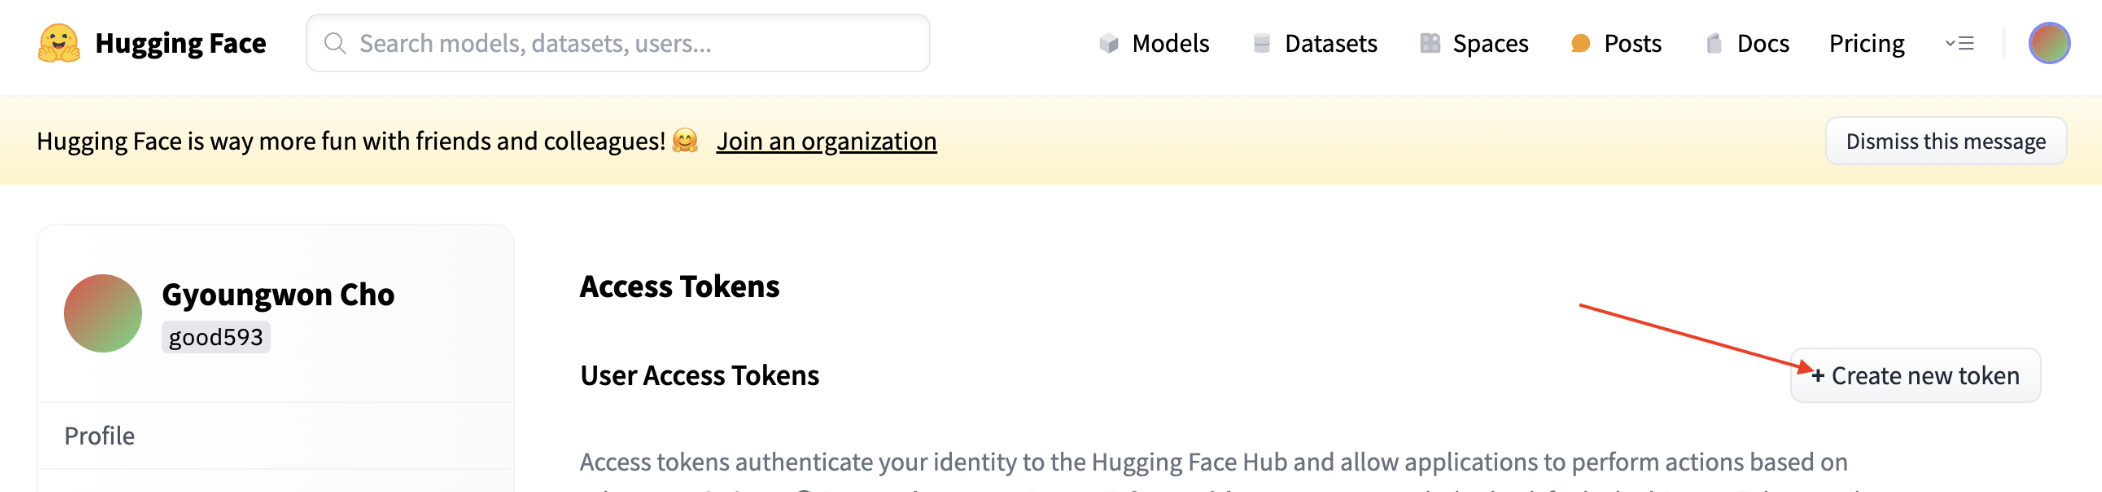

In [ ]:
# 필요한 라이브러리 import
import os  # 운영체제 환경 변수 접근을 위한 모듈
from huggingface_hub import login  # Hugging Face Hub 로그인 함수

# 환경 변수에 Hugging Face API 토큰 설정
# 주의: 실제 사용 시에는 "hf_" 뒤에 실제 토큰을 입력해야 합니다
# 예: "hf_abcdefghijklmnopqrstuvwxyz1234567890"
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "hf_"

# 환경 변수에서 Hugging Face 토큰 가져오기
# os.getenv()는 지정된 환경 변수의 값을 반환하거나, 없으면 None을 반환
hf_token = os.getenv("HUGGINGFACEHUB_API_TOKEN")

# 토큰이 올바르게 설정되었는지 검증
# 토큰이 없거나 빈 문자열인 경우 에러를 발생시킴
if not hf_token:
    raise ValueError("HUGGINGFACEHUB_API_TOKEN이 설정되지 않았습니다. .env 파일을 확인하세요.")

# Hugging Face Hub에 로그인 수행
# 이 단계를 통해 프라이빗 모델 접근, 모델 업로드 등의 권한을 얻습니다
login(token=hf_token)
print("Hugging Face Hub 로그인 성공!")

Hugging Face Hub 로그인 성공!


# Leaderboard

## [LLM Leaderboard](https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard)

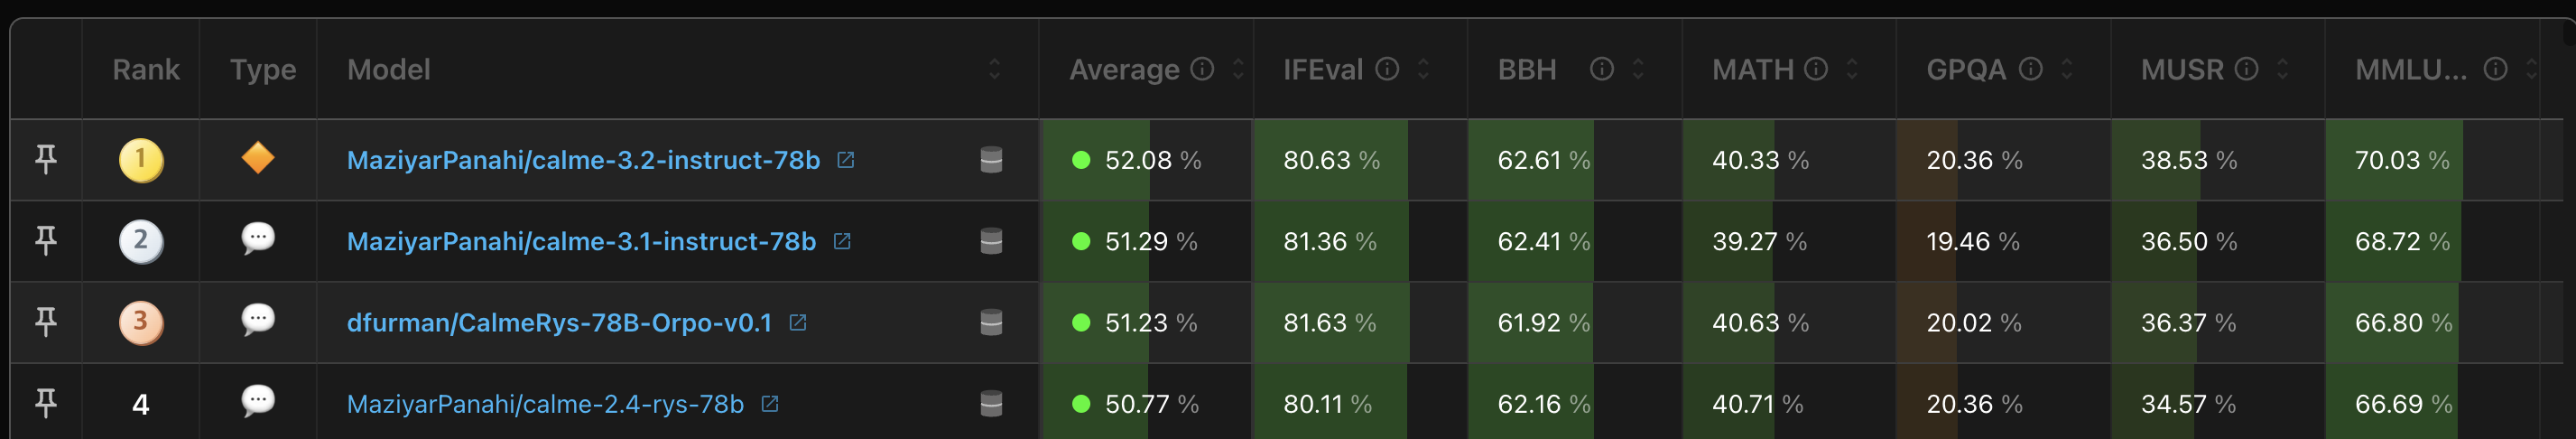

## [Korean LLM Leaderboard](https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard#/?search=korea)

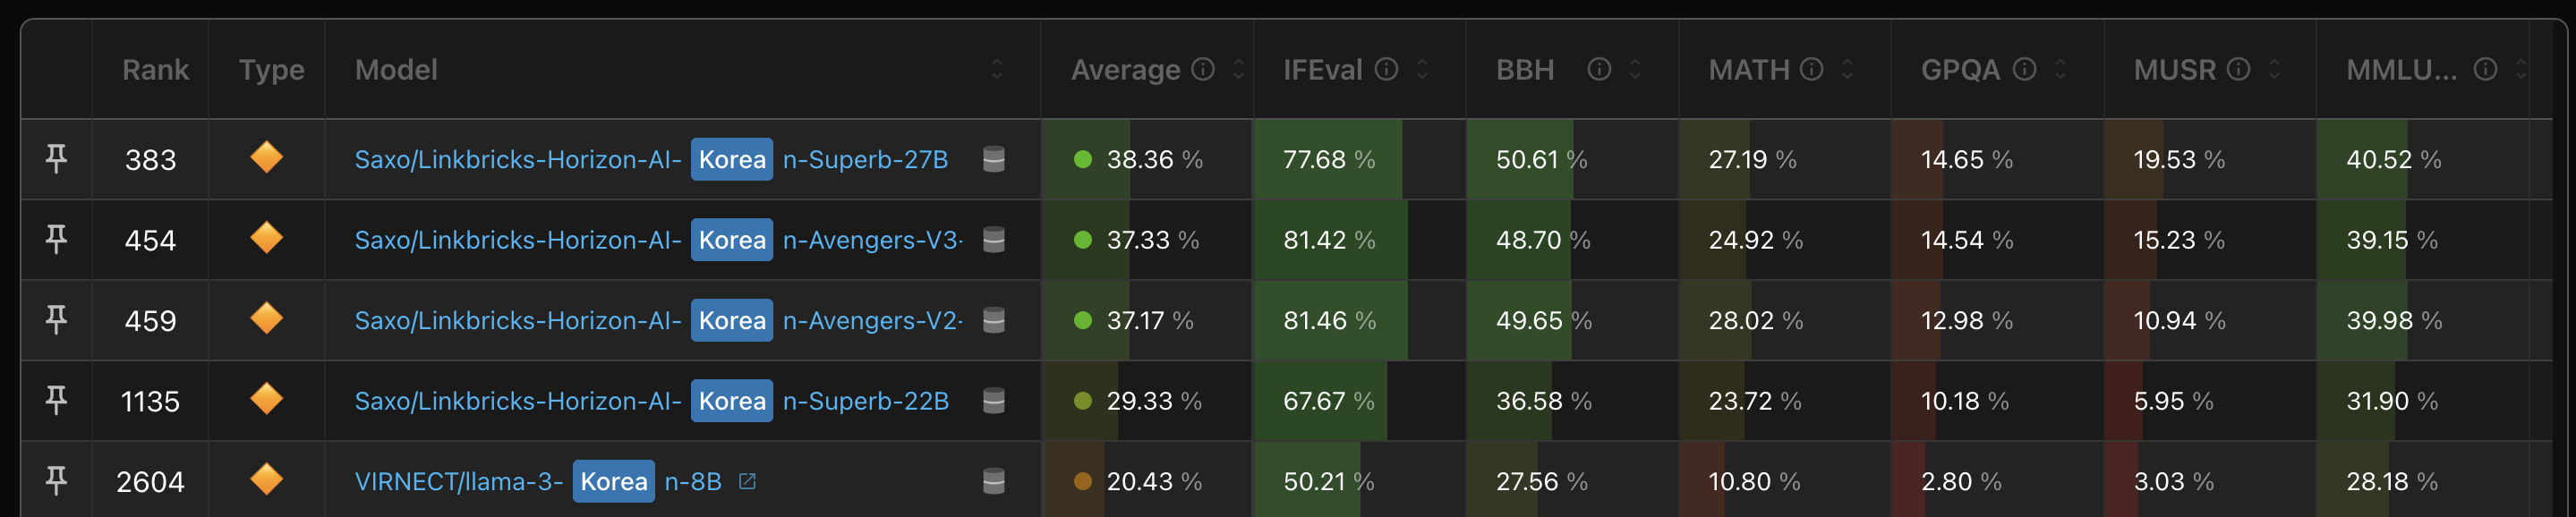

# 다운로드

## 모델 저장소 전체를 다운로드 

In [ ]:
from huggingface_hub import snapshot_download

# GPT-2 모델의 전체 저장소를 로컬에 다운로드
# snapshot_download: 모델의 모든 파일(config.json, pytorch_model.bin, tokenizer 등)을 한 번에 다운로드
# repo_id: Hugging Face Hub에서의 모델 식별자 (organization/model-name 형식)
# cache_dir: 다운로드한 파일들을 저장할 로컬 디렉토리 경로
local_path = snapshot_download(repo_id="gpt2", cache_dir="./custom_models")
print(local_path)  # 실제 저장 경로 출력 (예: ./custom_models/models--gpt2/snapshots/해시값)


Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

./custom_models/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e


- 특정 버전 다운로드

In [ ]:
# 특정 버전(브랜치/태그/커밋)의 모델 다운로드
# revision: 다운로드할 특정 버전을 지정
#   - "main": 기본 브랜치 (최신 버전)
# Git과 유사한 버전 관리 시스템으로 모델의 특정 시점을 다운로드할 수 있음
snapshot_download(repo_id="gpt2", revision="main", cache_dir="./custom_models")


Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

'./custom_models/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e'

## 특정 파일만 다운로드 

In [ ]:
from huggingface_hub import hf_hub_download

# 모델 저장소에서 특정 파일만 선택적으로 다운로드
# 전체 모델을 다운로드하지 않고 필요한 파일만 가져올 때 유용
file_path = hf_hub_download(
    repo_id="bert-base-uncased",    # BERT base 모델의 uncased 버전
    filename="config.json",         # 모델 설정 파일만 다운로드
    local_dir="./custom_models"     # 현재 디렉토리의 custom_models 폴더에 저장
)
print(file_path)  # 다운로드된 파일의 실제 경로 출력


custom_models/config.json


## 원하는 모델 탐색

In [ ]:
from huggingface_hub import list_models

# Hugging Face Hub에서 조건에 맞는 모델들을 검색
# filter: 모델 태스크 유형으로 필터링 ("text-classification", "text-generation", "image-classification" 등)
# limit: 반환할 모델 개수 제한 (기본값은 None으로 모든 결과 반환)
# 다른 필터 옵션들:
#   - author: 특정 작성자의 모델만 검색
#   - language: 특정 언어의 모델만 검색
#   - task: 세부 태스크로 필터링
models = list_models(filter="text-classification", limit=3)

# 검색된 모델들의 정보 출력
for model in models:
    # model.id: 모델의 고유 식별자 (organization/model-name)
    # model.downloads: 해당 모델의 다운로드 수 (인기도 지표)
    print(model.id, model.downloads)


facebook/bart-large-mnli 3623187
BAAI/bge-reranker-v2-m3 2360481
tabularisai/multilingual-sentiment-analysis 401196


# 업로드

## 저장소 생성

In [ ]:
from huggingface_hub import HfApi

# HfApi 인스턴스 생성 - Hub의 다양한 기능에 접근할 수 있는 API 객체
api = HfApi()

try:
    # 사용자의 Hugging Face 계정 ID 설정
    huggingface_id = "good593"
    
    # 새로운 모델 저장소 생성
    # repo_id: "username/repository-name" 형식의 저장소 식별자
    # private: True로 설정하면 비공개 저장소, False면 공개 저장소
    # repo_type: "model" (기본값), "dataset", "space" 중 선택 가능
    api.create_repo(repo_id=f"{huggingface_id}/my-awesome-model", private=True)
    print("저장소가 성공적으로 생성되었습니다!")
except Exception as e:
    # 저장소가 이미 존재하거나 다른 오류가 발생한 경우
    print("이미 생성되어 있음")


## 모델 업로드

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 사용할 사전 훈련된 모델의 이름 지정
model_name = "bert-base-uncased"  # BERT base 모델의 uncased 버전
cache_dir = "./custom_models/"    # 모델과 토크나이저를 저장할 로컬 캐시 디렉토리

# 토크나이저 로드: 텍스트를 모델이 이해할 수 있는 토큰으로 변환하는 도구
# AutoTokenizer는 모델 이름을 기반으로 적절한 토크나이저를 자동 선택
tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir=cache_dir)

# 시퀀스 분류를 위한 모델 로드 (텍스트 분류, 감정 분석 등에 사용)
# AutoModelForSequenceClassification은 분류 헤드가 추가된 모델을 자동 로드
model = AutoModelForSequenceClassification.from_pretrained(model_name, cache_dir=cache_dir)

# 로드된 모델과 토크나이저를 Hugging Face Hub에 업로드
# push_to_hub(): 모델/토크나이저를 본인의 Hub 계정에 업로드하는 메서드
# "my-awesome-model": 업로드될 저장소의 이름 (이전에 생성한 저장소와 동일해야 함)
model.push_to_hub("my-awesome-model")        # 모델 가중치와 설정 파일 업로드
tokenizer.push_to_hub("my-awesome-model")    # 토크나이저 설정 파일 업로드


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/good593/my-awesome-model/commit/de76c9ab3fff1eac302444d8854423c3fc498ac5', commit_message='Upload tokenizer', commit_description='', oid='de76c9ab3fff1eac302444d8854423c3fc498ac5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/good593/my-awesome-model', endpoint='https://huggingface.co', repo_type='model', repo_id='good593/my-awesome-model'), pr_revision=None, pr_num=None)

## 개별 파일 업로드

In [ ]:
from huggingface_hub import upload_file

# 사용자의 Hugging Face 계정 ID
huggingface_id = "good593" 

# 개별 파일을 Hub 저장소에 업로드
# 모델 파일 외에 추가적인 파일들(설명서, 예제, 데이터 등)을 업로드할 때 사용
upload_file(
    path_or_fileobj="test.json",                              # 업로드할 로컬 파일 경로
    path_in_repo="test.json",                                 # Hub 저장소 내에서의 파일 경로
    repo_id=f"{huggingface_id}/my-awesome-model",            # 대상 저장소 (username/repo-name)
    commit_message="Add test file"                            # Git 커밋 메시지 (변경 사항 설명)
)
# 성공하면 업로드된 파일의 URL이 반환됨


CommitInfo(commit_url='https://huggingface.co/good593/my-awesome-model/commit/f3a34ea8f9d9b9d94961936991ee90f6bfa33d76', commit_message='Add test file', commit_description='', oid='f3a34ea8f9d9b9d94961936991ee90f6bfa33d76', pr_url=None, repo_url=RepoUrl('https://huggingface.co/good593/my-awesome-model', endpoint='https://huggingface.co', repo_type='model', repo_id='good593/my-awesome-model'), pr_revision=None, pr_num=None)

In [ ]:
from huggingface_hub import HfApi

# API 인스턴스 생성
api = HfApi()

try:
    # 사용자의 Hugging Face 계정 ID
    huggingface_id = "good593"
    
    # 지정된 저장소를 완전히 삭제
    api.delete_repo(repo_id=f"{huggingface_id}/my-awesome-model")
    print("삭제가 완료되었습니다.")
except Exception as e:
    # 삭제할 저장소가 존재하지 않거나 권한이 없는 경우
    print("삭제할 대상이 없습니다.")

삭제가 완료되었습니다.


# 주요 함수 요약

| 함수                    | 역할                   |
| --------------------- | -------------------- |
| `login()`             | Hugging Face Hub 로그인 |
| `snapshot_download()` | 모델 저장소 전체 다운로드       |
| `hf_hub_download()`   | 특정 파일 다운로드           |
| `list_models()`       | 모델 목록 검색             |
| `list_datasets()`     | 데이터셋 목록 검색           |
| `create_repo()`       | 모델/데이터셋/Space 저장소 생성 |
| `upload_file()`       | 개별 파일 업로드            |
| `delete_repo()`       | 저장소 삭제               |
